In [1]:
import tensorflow as tf
import zipfile
import io
import os
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt

2023-07-14 15:52:05.801502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
lr_files = os.listdir('DIV2K_valid_LR_bicubicX4')
lr_files.sort(key=lambda x: int(re.findall('\d+', x)[0]))

lr_images = []
for img_file in lr_files:
    img_path = os.path.join('DIV2K_valid_LR_bicubicX4/', img_file)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [64, 64])
    img = img / 127.5 - 1.0
    lr_images.append(img)
    

In [3]:
hr_files = os.listdir('DIV2K_valid_HR')
hr_files.sort(key=lambda x: int(re.findall('\d+', x)[0]))

hr_images = []
for img_file in hr_files:
    img_path = os.path.join('DIV2K_valid_HR/', img_file)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [256, 256])
    img = img / 127.5 - 1.0
    hr_images.append(img)


In [4]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


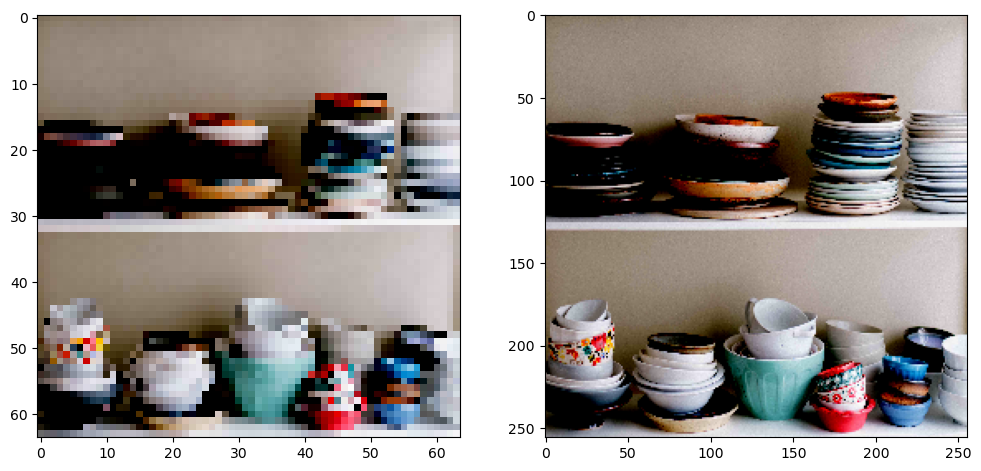

In [5]:
import random
image_number = random.randint(0, len(lr_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(lr_images[image_number], (64, 64, 3)))
plt.subplot(122)
plt.imshow(np.reshape(hr_images[image_number], (256, 256, 3)))
plt.show()

In [6]:
lr_test= lr_images
hr_test = hr_images


In [7]:
from keras.models import load_model
from numpy.random import randint

In [11]:
generator = load_model('gen_en_150.h5', compile=False)

In [12]:
[X1, X2] = [lr_test, hr_test]
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image = generator.predict(src_image)

1/1 [==============================] - 1s 745ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


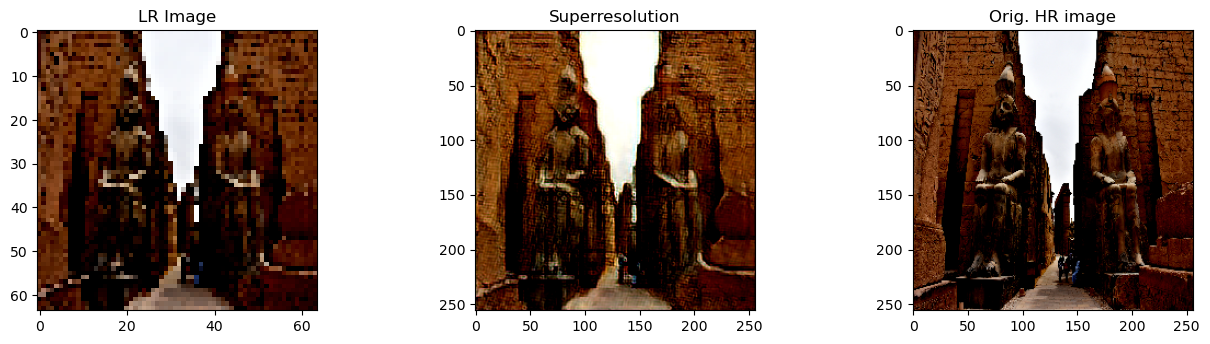

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()